## Import the packages

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

## Load the dataset

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print("Shape of x_train:",x_train.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_train: (60000, 28, 28)
Shape of x_test: (10000, 28, 28)
Shape of y_train: (60000,)
Shape of y_test: (10000,)


## Scaling the data

In [ ]:
x_train,x_test = x_train/255.0 , x_test/255.0

## Building the model

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape = (28,28)),
                                    tf.keras.layers.Dense(128,activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10,activation='softmax')
])

## Compiling the model

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

## Training the model

In [ ]:
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2969 - accuracy: 0.9126 - val_loss: 0.1377 - val_accuracy: 0.9589
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1453 - accuracy: 0.9568 - val_loss: 0.0987 - val_accuracy: 0.9687
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1083 - accuracy: 0.9673 - val_loss: 0.0873 - val_accuracy: 0.9724
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0892 - accuracy: 0.9728 - val_loss: 0.0830 - val_accuracy: 0.9763
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0744 - accuracy: 0.9768 - val_loss: 0.0748 - val_accuracy: 0.9759
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0674 - accuracy: 0.9783 - val_loss: 0.0747 - val_accuracy: 0.9760
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0594 - accuracy: 0.9804 - val_loss: 0.0684 - val_accuracy:

## Loss per iteration

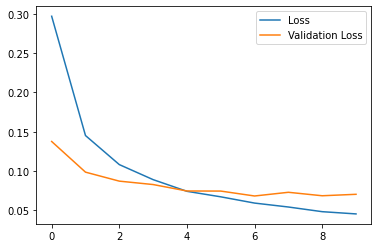

In [ ]:
plt.plot(r.history['loss'],label='Loss')
plt.plot(r.history['val_loss'],label = 'Validation Loss')
plt.legend()

## Accuracy per iteration

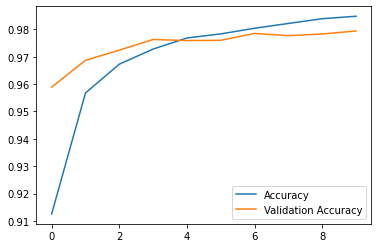

In [ ]:
plt.plot(r.history['accuracy'],label='Accuracy')
plt.plot(r.history['val_accuracy'],label = 'Validation Accuracy')
plt.legend()

## Evaluating the model

In [ ]:
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0706 - accuracy: 0.9794
[0.07057442516088486, 0.9793999791145325]


## Confusion Matrix

Confusion matrix, without normalization
[[ 970    0    3    1    0    1    3    1    1    0]
 [   0 1126    3    1    0    1    2    0    2    0]
 [   2    1 1016    4    1    0    2    3    3    0]
 [   1    0    7  990    0    5    0    4    3    0]
 [   1    0    2    0  961    0    7    3    1    7]
 [   2    0    0    9    0  871    4    0    5    1]
 [   4    2    1    1    2    3  945    0    0    0]
 [   1    5    8    2    1    0    0 1006    1    4]
 [   3    1    5    6    4    5    4    3  941    2]
 [   3    5    0    3   17    5    1    4    3  968]]


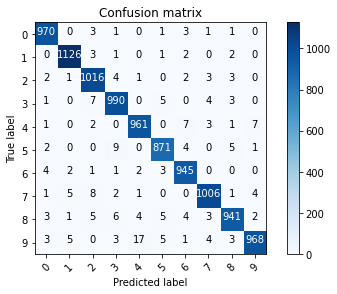

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


## Observation
The confusion matrix shows that the model is confused between :-

9 and 4

2 and 7

7 and 9  etc

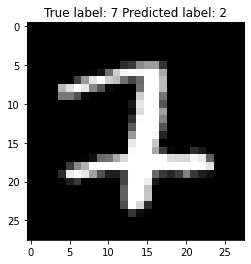

In [ ]:
# In the lines below we randomely choose the records for which
# the model has predicted incorrectly.

misclassified_img = np.where(p_test!=y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted label: %s" %(y_test[i],p_test[i]));

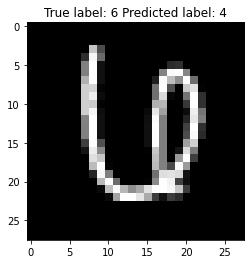

In [ ]:
misclassified_img = np.where(p_test!=y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted label: %s" %(y_test[i],p_test[i]));

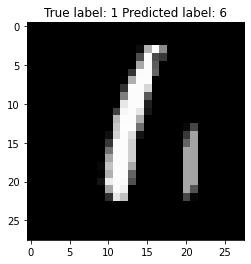

In [ ]:
misclassified_img = np.where(p_test!=y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted label: %s" %(y_test[i],p_test[i]));

# By : Rashi Saluja